In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load train and test file
train = pd.read_csv('./data/train.csv', parse_dates=['Original_Quote_Date'], index_col='QuoteNumber')
test = pd.read_csv('./data/test.csv', parse_dates=['Original_Quote_Date'], index_col='QuoteNumber')

In [3]:
# number of columns
print len(train.columns)

298


## Exploratory Data Analysis

In [5]:
# take a look at some of the examples
train.head()

,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
QuoteNumber,,,,,,,,,,,,,,,,,,,,,
1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,...,9,9,-1,8,-1,18,-1,10,N,CA
2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,...,10,10,-1,11,-1,17,-1,20,N,NJ
4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,...,15,18,-1,21,-1,11,-1,8,N,NJ
6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,...,6,5,-1,10,-1,9,-1,21,N,TX
8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,...,18,22,-1,10,-1,11,-1,12,N,IL


In [6]:
train[train.QuoteConversion_Flag==0].head()

,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
QuoteNumber,,,,,,,,,,,,,,,,,,,,,
1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,...,9,9,-1,8,-1,18,-1,10,N,CA
2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,...,10,10,-1,11,-1,17,-1,20,N,NJ
4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,...,15,18,-1,21,-1,11,-1,8,N,NJ
6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,...,6,5,-1,10,-1,9,-1,21,N,TX
8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,...,18,22,-1,10,-1,11,-1,12,N,IL


In [7]:
train[train.QuoteConversion_Flag==1].head()

,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
QuoteNumber,,,,,,,,,,,,,,,,,,,,,
25,2013-10-22,1,J,20,0.9497,0.0004,"1,165",1.2665,N,18,...,16,20,-1,24,-1,8,-1,14,N,TX
26,2013-08-20,1,B,24,0.9403,0.0006,965,1.0200,N,5,...,13,16,-1,17,25,25,-1,13,N,CA
32,2013-10-02,1,F,11,0.9919,0.0038,564,1.1886,N,4,...,7,6,-1,16,-1,13,-1,8,N,NJ
47,2015-03-30,1,F,22,1.0101,0.0040,548,1.2694,N,13,...,13,16,25,25,-1,4,25,25,N,NJ
64,2014-02-24,1,F,11,0.9685,0.0040,548,1.1886,N,7,...,12,14,-1,9,-1,21,-1,24,N,NJ


In [8]:
# see 5 number summary
train.describe()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
count,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,...,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000
mean,0.187511,18.293339,0.938346,0.001451,1.162718,9.012533,13.000403,9.054005,13.015240,9.053150,...,11.567756,12.985695,11.694903,13.049882,-0.350481,12.994362,-0.343601,13.042734,-0.341009,14.122948
std,0.390322,7.382803,0.037086,0.001486,0.116833,5.576509,7.219264,5.560521,7.211717,5.579687,...,5.448425,7.216091,5.626092,7.213636,4.057792,7.219943,4.078673,7.145248,4.086511,5.829091
min,0.000000,1.000000,0.874600,0.000400,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,11.000000,0.915300,0.000600,1.020000,5.000000,7.000000,5.000000,7.000000,5.000000,...,8.000000,7.000000,7.000000,7.000000,-1.000000,7.000000,-1.000000,7.000000,-1.000000,8.000000
50%,0.000000,23.000000,0.940300,0.000600,1.188600,8.000000,13.000000,8.000000,13.000000,8.000000,...,11.000000,13.000000,11.000000,13.000000,-1.000000,13.000000,-1.000000,13.000000,-1.000000,13.000000
75%,0.000000,24.000000,0.968500,0.003800,1.266500,12.000000,19.000000,12.000000,19.000000,12.000000,...,15.000000,19.000000,15.000000,19.000000,-1.000000,19.000000,-1.000000,19.000000,-1.000000,19.000000
max,1.000000,28.000000,1.010100,0.004000,1.304500,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


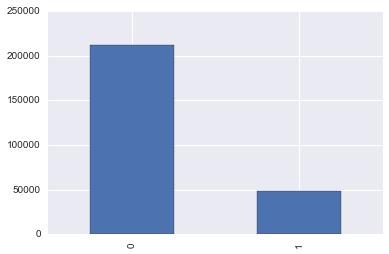

In [28]:
train.QuoteConversion_Flag.value_counts().plot(kind='bar');

In [29]:
def num_zero_features(row):
    return list(row).count(0)

train['count_zero'] = train.apply(num_zero_features, axis=1)

In [33]:
train = train.fillna(-1)

In [37]:
train['count_missing'] = train.apply(lambda x: list(x).count(-1), axis=1)

In [31]:
train.groupby(['QuoteConversion_Flag', 'count_zero']).size()

QuoteConversion_Flag  count_zero
0                     30                3
                      32                5
                      33                9
                      34               15
                      35               20
                      36               29
                      37               40
                      38               59
                      39               64
                      40               89
                      41              107
                      42              128
                      43              179
                      44              233
                      45              369
                      46              564
                      47              931
                      48             1595
                      49             2893
                      50             4132
                      51             5975
                      52             8522
                      53            10279
 

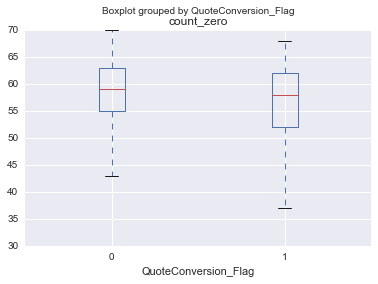

In [32]:
train.boxplot(column='count_zero', by='QuoteConversion_Flag')

In [39]:
train.groupby(['QuoteConversion_Flag', 'count_missing']).size()

QuoteConversion_Flag  count_missing
0                     9                    4
                      10                  73
                      11                1060
                      12                8515
                      13               30034
                      14               56153
                      15               67895
                      16               20577
                      17               24922
                      18                 329
                      19                 555
                      20                 230
                      21                 175
                      22                 144
                      23                  75
                      24                  36
                      25                   8
                      26                   4
                      27                   4
                      28                   3
                      29                   6
                   